# A/B Testing Example

We will now run through the steps in A/B testing through an example. Consider the following scenario: Cal, a student at UC Berkeley, is signing up for classes and gets to decide between taking his Data Science class in the morning or in the afternoon. He has heard from some students that students in the afternoon class get better grades on their finals. Cal wants to determine whether there is truly a difference between the distributions of students in the morning classes and the afternoon classes, or whether this difference he observed was due to the people he talked to (random chance).

In [14]:
%matplotlib inline

from datascience import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Data:
Cal has randomly asked students in the morning class and the afternoon class about their grade on the final. He collected this data in a table called classes. 

In [2]:
classes = Table.read_table('classesdata.csv')
classes

Time,Score
am,77.9
am,71.8
am,71.6
am,74.2
am,73.9
am,76.2
am,76.2
am,73.5
am,70.7
am,69.5


In [3]:
classes.group('Time', np.average)

Time,Score average
am,74.745
pm,75.056


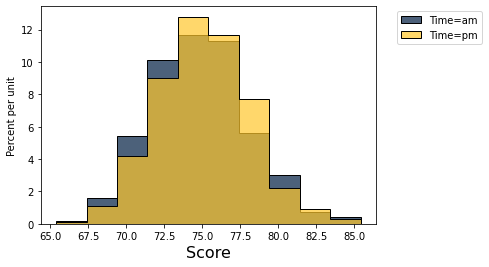

In [19]:
classes.hist('Score', group='Time')

## 1. Formulate hypotheses.

Null hypothesis:

Alternative hypothesis:

## 2. Define test statistic.

Test statistic = avg afternoon grade - avg morning grade

## 3. Calculate observed value of the test statistic.

In [5]:
means_table = ...
means_table

Time,Score average
am,74.745
pm,75.056


In [6]:
observed_stat = ...
observed_stat

0.31099999999999284

## 4. Simulate test statistic under the null hypothesis.

In [7]:
## Shuffle the labels

shuffled = ...
tbl_w_shuffled = ...
tbl_w_shuffled

Time,Score,Shuffled Label
am,77.9,pm
am,71.8,am
am,71.6,pm
am,74.2,pm
am,73.9,am
am,76.2,am
am,76.2,am
am,73.5,pm
am,70.7,pm
am,69.5,am


In [8]:
## Calculate the test statistic with these shuffled labels
shuffled_tbl = ...
shuffled_group_means = ...
shuffled_group_means

Shuffled Label,Score average
am,74.776
pm,75.025


In [9]:
## Create a function to do this process many times

def calculate_test_stat(tbl, label, group_label):
    ...
    return ...

In [10]:
calculate_test_stat(classes, 'Score', 'Time')

-0.22819999999998686

In [11]:
## How can we do this process many times and store the simulated test stat each time?
## This will help us to understand the variance of the test statistic

diffs = ...

...


diffs

array([-0.145 ,  0.0138,  0.045 , ...,  0.0094, -0.1382, -0.0666])

## 5. Make a conclusion.

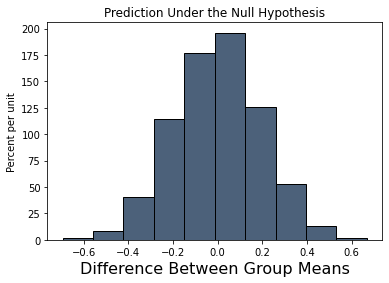

In [15]:
## Plot the distribution of the simulated test statistics.

Table().with_column('Difference Between Group Means', diffs).hist()
plt.title('Prediction Under the Null Hypothesis');

In [20]:
## Calculate the p-value

p_val = ...
p_val

0.0554